# 17 - Predictive Models 101

We are leaving Part I of this book. That part covered the core about causal inference. Techniques over there are very well known and established. They have survived the test of time. Part I builds the solid foundation we can rely upon. In more technical terms, Part I focuses on defining what is causal inference, what are the biases that prevents correlation from being causation, multiple ways to adjust for those biases (regression, matching and propensity score) and canonical identification strategies (instrumental variables, diff-in-diff and RDD). In summary, Part I focuses on the standard techniques we use to identify the average treatment effect $E[Y_1 - Y_0]$. 
 
As we move to Part II, things will get a bit shaky. We will cover recent developments in the causal inference literature, its relationship with Machine Learning and applications in the industry. In that sense, we trade-off academic rigour for applicability and empiricism. Some methods presented in Part II don't have a solid theory about why they work. Still, when we try them, they seem to work nevertheless. In that sense, Part II might be more useful for industry practitioners that want to use causal inference in their day to day work, rather than scientists who want to research a fundamental causal relationship in the world. 
 
The first few chapters of part two will focus on estimating heterogeneous treatment effects. We will move from a world where all we cared about was the average treatment effect, $E[Y_1 - Y_0]$, to one where we want to know how different units respond differently to the treatment $E[Y_1 - Y_0 | X]$. This is the world where personalisation is paramount. We want to prioritise treating those whose treatment effect will be the most impactful and we don't want to treat those to whom the treatment will be harmful. In a sense, we are also moving from a positive question about what is the average treatment effect to a normative question: who should we treat? 
 
This is the question most businesses ask themselves, albeit in slightly different terms: who should I give discounts to? What interest rate should I charge on a loan? What item should I recommend to this user? What page layout should I show to each customer? Those are all treatment effect heterogeneity questions that we can answer with the tools presented in Part II. But before we do that, it's only fair that I present what Machine Learning means to the industry, as this will become a fundamental tool we will later use for causal inference. 


## Machine Learning in the Industry
 
The focus of this chapter is to talk about how we normally use **machine learning** in the industry. If you are not familiar with machine learning, you can see this chapter as a machine learning crash course. And if you've never worked with ML before, I strongly recommend you learn at least the basics to get the most out of what's to come. But this doesn't mean you should skip this chapter if you are already versed in ML. I still think you will benefit from reading it through. Differently from other machine learning material, this one will **not** discuss the ins and outs of algorithms like decision trees or neural networks. Instead, it will be laser focused on **how machine learning is applied in the real world**.
 
![img](./data/img/industry-ml/ml-meme.png)
 
The first thing I want to adress is why are we talking about machine learning in a causal inference book? The short answer is because I think one of the best ways to understand causality is to put it in contrast with the predictive models approach brought by machine learning. The long answer is twofold. First, if you've got to this point in this book, there is a high chance you are already familiar with machine learning. Second, even if you aren't, given the current popularity of these topics, you probably already have some idea on what they are. The only problem is that, with all the hype around machine learning, I might have to bring you back to earth and explain what it really does in very practical terms. Finally, more recent developments in causal inference make heavy use of machine learning algorithms, so there is that too. 
 
Being very direct, **machine learning is a way to make fast, automatic and good predictions**. That's not the entire picture, but it covers 90% of it. It's in the field of supervised machine learning where most of the cool advancements, like computer vision, self-driving cars, language translation and diagnostics, have been made. Notice how, at first, these might not seem like prediction tasks. How is language translation a prediction? And that's the beauty of machine learning. We can solve more problems with prediction than what is initially apparent. In the case of language translation, you can frame it as a prediction problem where you present a machine with one sentence and it has to predict the same sentence in another language. Notice that I'm **not** using the word prediction in a forecasting or anticipating the future sense. Prediction is simply mapping from one defined input to an initially unknown but equally well defined and observable output. 
 
![img](./data/img/industry-ml/translation.png)
 
What machine learning really does is it learns this mapping function, even if it is a very complicated mapping function. The bottom line is that if you can frame a problem as this mapping from an input to an output, then machine learning might be a good candidate to solve it. As for self-driving cars, you can think of it as not one, but multiple complex prediction problems: predicting the correct angle of the wheel from sensors in the front of the car, predicting the pressure in the brakes from cameras around the car, predicting the pressure in the accelerator from gps data. Solving those (and a tone more) of prediction problems is what makes a self driving car.

A more technical way of thinking about ML is in term of estimating (possibly very complex) expectation functions: 
 
$
E[Y|X]
$
 
Where $Y$ is what you want to know (translated sentence, diagnostica) and $X$ is what you already know (input sentence, x-ray image). Machine learning is simply a way of estimating that conditional expectation function. 


OK… You now understand how prediction can be more powerful than we first thought. Self-driving cars and language translation are cool and all, but they are quite distant, unless you work at a major tech company like Google or Uber. So, to make things more relatable, let's talk in terms of problems almost every company has: customer acquisition (that is getting new customers). 
 
From the customer acquisition perspective, what you often have to do is figure out who the profitable customers are. In this problem, each customer has a cost of acquisition (maybe marketing costs, onboarding costs, shipping costs...) and will hopefully generate a positive cashflow for the company. For example, let's say you are an internet provider or a gas company. Your typical customer might have a cash flow that looks something like this.
 
![img](./data/img/industry-ml/cashflow-1.png)
 
Each bar represents a monetary event in the life of your relationship with the customer. For example, to get a customer, right off the bat, you need to invest in marketing. Then, after someone decides to do business with you, you might incur some sort of onboarding cost (where you have to explain to your customer how to use your product) or installation costs. Only then, the customer starts to generate monthly revenues. At some point, the customer might need some assistance and you will have maintenance costs. Finally, if the customer decides to end the contract, you might have some final costs for that too. 
 
To see if this is a profitable customer, we can rearrange the bar in what is called a cascade plot. Hopefully, the sum of the cash events end up way above the zero line.
 
![img](./data/img/industry-ml/cascade-1.png)
 
In contrast, it could very well be that the customer will generate much more costs than revenues. If he or she uses very little of your product and has high maintenance demands, when we pile up the cash events, they could end up below the zero line.
 
![img](./data/img/industry-ml/cascade-2.png)
 
Of course, this cash flow could be simpler or much more complicated, depending on the type of business. You can do stuff like time discounts with an interest rate and get all crazy about it, but I think the point here is made.
 
But what can you do about this? Well, if you have many examples of profitable and non profitable customers, you can train a machine learning model to identify them. That way, you can focus your marketing strategies that engage only on the profitable customers. Or, if your contract permits, you can end relations with a customer before he or she generates more costs. Essentially, what you are doing here is **framing the business problem as a prediction problem so that you can solve it with machine learning**: you want to predict or identify profitable and unprofitable customers so that you only engage with the profitable ones.

In [2]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("ggplot")

For instance, suppose you have 30 days of transactional data on 10000 customers. You also have the cost of acquisition `cacq`. This could be the bid you place for them if you are doing online marketing, it could be the cost of shipping or any training you have to do with your customer so they can use your product. Also, for the sake of simplicity (this is a crash course, not a semester on customer valuation), let's pretend you have total control of the customer that you do business with. In other words, you have the power to deny a customer even if he or she wants to do business with you. If that's the case, your task now becomes identifying who will be profitable beforehand, so you can choose to engage only with them.

In [3]:
transactions = pd.read_csv("data/customer_transactions.csv")
print(transactions.shape)
transactions.head()

(10000, 32)


,customer_id,cacq,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,...,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29
0,0,-110,6,0,73,10,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0
1,1,-58,0,0,0,15,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,-30,0,3,2,0,9,0,0,0,...,0,0,40,0,0,0,0,0,0,0
4,4,-42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What we need to do now is distinguish the good from the bad customers according to this transactional data. For the sake of simplicity, I'll just sum up all transactions and the CACQ. Keep in mind that this throws under the rug a lot of nuances, like distinguishing customers that are churned from those that are in a break between one purchase and the next.
 
I'll then join this sum, which I call `net_value`, with customer specific features. Since my goals is to figure out which customer will be profitable **before** deciding to engage with them, you can only use data prior to the acquisition period. In our case, these features are age, region and income, which are all available at another `csv` file.

In [4]:
profitable = (transactions[["customer_id"]]
              .assign(net_value = transactions
                      .drop(columns="customer_id")
                      .sum(axis=1)))

customer_features = (pd.read_csv("data/customer_features.csv")
                     .merge(profitable, on="customer_id"))

customer_features.head()

,customer_id,region,income,age,net_value
0,0,30,1025,24,130
1,1,41,1649,26,10
2,2,18,2034,33,-6
3,3,20,1859,35,136
4,4,1,1243,26,-8


Good! Our task is becoming less abstract. We wish to identify the profitable customers (`net_value > 0`) from the non profitable ones. Let's try different things and see which one works better. But before that, we need to take a quick look into Machine Learning (feel free skip if you know how ML works) 
 
## Machine Learning Crash Course
 
For our intent and purpose, we can think of ML as an overpowered way of making predictions. For it to work, you need some data with labels or the ground truth of what you are predicting. Then, you can train a ML model on that data and use it to make predictions where the ground truth is not yet known. The image below exemplifies the typical machine learning flow.
 
![img](./data/img/industry-ml/ml-flow.png)
 
First, you need data where the ground truth, `net_value` here, is known. Then, you train a ML model that will use features - region, income and age in our case - to predict `net_value`. This training or estimating step will produce a machine learning model that can be used to make predictions about `net_value` when you don't yet have the true `net_value`. This is shown in the left part of the image. You have some new data where you have the features (region, income and age) but you don't know the `net_value` yet. So you pass this data through your model and it provides you with `net_value` predictions. 
 
If you are more into technical notation, another way of understanding machine learning is in term of estimating a conditional expectation $E[Y|X]$, where $Y$ is called the target variable or outcome and $X$ is called the feature variables. ML is just a powerful way of obtaining $\hat{E}[Y|X]$, usually by optimizing some error or loss function.
 
One tricky thing with ML models is that they can approximate almost any function. Another way of saying this is that they can be made so powerful as to perfectly fit the data in the training set. Machine learning models often have what we call complexity hyperparameters. These things adjust how powerful or complex the model can be. In the image below, you can see examples of a simple model (left), an intermediate model (middle) and a complex and powerful model (right). Notice how the complex model has a perfect fit of the training data.
 
![img](./data/img/industry-ml/model-fit.png)
 
This raises some problems. Namely, how can we know if our model is any good before using it to make predictions in the real world? One way we have is to compare the predictions with the actual values on the dataset where we have the ground truth. These are so-called goodness of fit metrics, like $R^2$. But remember that the model can be made so powerful as to perfectly fit the data. If this happens, the predictions will perfectly match the ground truth. This is problematic, because it means this validation is misleading, since we can nail it just by making my model more powerful and complex. 
 
Besides, it is generally **not** a good thing to have a very complex model. And you already have some intuition into why that is the case. In the image above, for instance, which model do you prefer? The more complex one that gets all the predictions right? Probably not. You probably prefer the middle one. It's smoother, simpler and yet, it still makes some good predictions, even if it doesn't perfectly fit the data.
 
![img](./data/img/industry-ml/overfitting.jpg)
 
Your intuition is in the right place. What happens if you give too much power to your model, is that it will not only learn the patterns in your data, but it also learns the random noise. Since the noise will be different when you use the model to make predictions in the real world (it's random after all), your "perfect" model will make mistakes. In ML terms, we say that models that are too complex are overfitting and don't generalize well. So, what can we do?
 
We are going to pretend  we don't have access to parts of the data. The idea is to split the dataset for which we have the ground truth into two. Then, we can give one part for the model to train on and the other part we can use to validate the model predictions. This is called cross validation.
 
![img](./data/img/industry-ml/test.png)
 
In the dataset above, which the model didn't see during training, the complex model doesn't do a very good job. The model in the middle, on the other hand, seems to perform better. To choose the right model complexity, we can train different models, each one with a different complexity, and see how they perform on some data that we have the ground truth, but that was not used for training the model. Cross validation is so important we should probably spend more time on it.

## Cross Validation
 
Cross validation is essential for selecting the model complexity but it's useful beyond that. We can use it whenever we want to try many different things and estimate how they would play out in the real world. The idea being cross validation is to mimic the real world, where we estimate a model on the data that we have, but we make predictions on new, unseen data. The holdout data that we pretend not to have serves as a proxy to what we will encounter in the wild. 
 
Let's see how we can apply cross validation to the whole problem of figuring out which customers are profitable or not. Here is an outline of what we should do:
 
1. We have data on existing customers. In this data, we know which ones are profitable and which ones are not (we know the ground truth). Let's call our internal data the training set.
2. We will use the internal data to *learn* a rule that tells us which customer is profitable (hence training).
3. We will apply the rule to the holdout data that was **not** used for learning the rule. This should simulate the process of learning a rule in one dataset and applying it to another, a process that will be inevitable when we go to production and score truly unseen data.
 
Here is a picture of what cross validation looks like. There is the truly unseen data at the rightmost part of the image and then there is data that we only pretend not to have at learning time. 
 
![img](./data/img/industry-ml/cross-validation.png)
 
To summarize, we will partition our internal data into a training and a test set. We can use the training set to come up with models or rules that predict if a customer is profitable or not, but we will validate those rules in another partition of the dataset: the test set. This test set will be hidden from our learning procedure. 
 
Just as a side note here, there are tons of ways to make cross validation better other than this simple train test split (k-fold cross-validation or temporal cross validation, for instance), but for the sake of what we will do here, this is enough. Remember that the spirit of cross validation is to simulate what would happen once we go to a production environment. By doing that we hope to get more realistic estimates.
 
For our case, I won't do anything fancy. I'll just divide the dataset into two. 70% will be used to build a method that allows us to identify profitable customers and 30% will be used to evaluate how good that method is.

In [5]:
train, test = train_test_split(customer_features, test_size=0.3, random_state=13)
train.shape, test.shape

((7000, 5), (3000, 5))

## Predictions and Policies
 
![img](./data/img/industry-ml/profit.png)
 
We've been talking about methods and approaches to identify profitable customers but it is time we get more precise with our concepts. Let's introduce two new ones. A **prediction** is a number that estimates or predicts something. It's the estimation of $\hat{E}[y_i|X_i]$. For example, we can try to predict the profitability of a customer and the prediction would be something like 16 BRL, meaning that we predict this customer will generate 16 BRL in revenue. The point here is that prediction is a simple number. 
 
The second concept is that of a **policy**. A policy is an automatic decision rule. While a prediction is a number, a policy is a decision. For example, we can have a policy that engages with customers with income greater than 1000 and doesn't engage otherwise. We usually build policies on top of predictions: engage with all customers that have profitability predictions above 10 and don't engage otherwise, $\hat{E}[y_i|X_i] > 10$. Machine learning will usually take care of the first concept, that is, of prediction. But notice that predictions alone are useless. We need to attach some decision, or policy to it.
 
We can do very simple policies and models or very complicated ones. For both policies and predictions, we need to use cross validation, that is, estimate the policy or prediction in one partition of the data and validate its usefulness in another. Since we've already partitioned our data into two, we are good to go.
 
## One Feature Policies
 
Before we go machine learning crazy on this profitability problem, let's try the simple stuff first. The 80% gain with 20% effort stuff. This often work wonders and, surprisingly, most data scientists forget about it. So, what is the simplest thing we can do? Naturally, **just engage with all the customers!** Instead of figuring out which ones are profitable, let's just do business with everyone and hope the profitable customers more than compensate for the non profitable ones. 
 
To check if this is a good idea, we can see the average net value of the customers. If that turns out to be positive, it means that, on average, we will make money on our customers. Sure, there will be profitable and non profitable ones but, on average, if we have enough customers, we will make money. On the other hand, if this value is negative, it means that we will lose money if we engage with all the customers.

In [6]:
train["net_value"].mean()

-29.169428571428572

That's a bummer... If we engage with everyone, we would lose about 30 reais for customers we do business with. Our first, very simple thing didn't work and we better find something more promising if we don't want to go out of business. Just a quick side note here, keep in mind that this is a pedagogical example. Although the very simple, "treat everyone the same" kind of policy didn't work here, they often do in real life. It is usually the case that sending a marketing email to everyone is better than not sending it, or giving discounts coupons to everyone is often better than not giving them. 
 
Moving forward, what is the next simplest thing we can think of? One idea is taking our features and seeing if they alone distinguish the good from the bad customers. Take `income`, for instance. It's intuitive that richer customers should be more profitable, right? What if we do business only with the top richest customers? Would that be a good idea?
 
To figure this out we can partition our data into income quantiles (a quantile has the propriety of dividing the data into partitions of equal size, that's why I like them). Then, for each income quantile, let's compute the average net value. The hope here is that, although the average net value in negative, $E[NetValue]<0$, there might be some subpopulation defined by income where the net value is positive, $E[NetValue|Income=x]>0$, probably, higher income levels.

In [9]:
train

,customer_id,region,income,age,net_value
4847,4847,20,3492,27,7
9992,9992,5,719,35,-38
4621,4621,29,2089,29,-169
5774,5774,23,964,32,-79
9294,9294,35,2830,23,15
...,...,...,...,...,...
5876,5876,38,2133,23,127
866,866,4,1734,28,-37
7696,7696,39,1514,28,-78
74,74,38,5600,28,8


In [10]:
train.net_value.mean()

-29.169428571428572

In [15]:
train_new = train.assign(income_quantile=pd.qcut(train["income"], q=20))

In [16]:
train_new

,customer_id,region,income,age,net_value,income_quantile
4847,4847,20,3492,27,7,"(3324.0, 3782.2]"
9992,9992,5,719,35,-38,"(601.95, 719.0]"
4621,4621,29,2089,29,-169,"(1922.0, 2128.0]"
5774,5774,23,964,32,-79,"(958.0, 1082.5]"
9294,9294,35,2830,23,15,"(2636.0, 2946.6]"
...,...,...,...,...,...,...
5876,5876,38,2133,23,127,"(2128.0, 2377.4]"
866,866,4,1734,28,-37,"(1565.0, 1737.0]"
7696,7696,39,1514,28,-78,"(1389.0, 1565.0]"
74,74,38,5600,28,8,"(5104.1, 6459.0]"


In [17]:
train_new.groupby('income_quantile').net_value.mean()

income_quantile
(499.999, 601.95]   -17.420000
(601.95, 719.0]     -36.827195
(719.0, 834.0]      -30.342857
(834.0, 958.0]      -36.440000
(958.0, 1082.5]     -32.818444
(1082.5, 1241.7]    -35.822857
(1241.7, 1389.0]    -26.034188
(1389.0, 1565.0]    -27.674286
(1565.0, 1737.0]    -46.314286
(1737.0, 1922.0]    -29.421652
(1922.0, 2128.0]    -33.498567
(2128.0, 2377.4]    -28.613181
(2377.4, 2636.0]    -30.851852
(2636.0, 2946.6]    -28.616046
(2946.6, 3324.0]    -39.635328
(3324.0, 3782.2]    -30.040115
(3782.2, 4376.0]    -16.553977
(4376.0, 5104.1]    -16.155172
(5104.1, 6459.0]    -25.871795
(6459.0, 21289.0]   -14.352436
Name: net_value, dtype: float64

In [25]:
train_new.groupby('income_quantile').net_value.min()

income_quantile
(499.999, 601.95]   -553
(601.95, 719.0]     -557
(719.0, 834.0]      -554
(834.0, 958.0]      -552
(958.0, 1082.5]     -557
(1082.5, 1241.7]    -546
(1241.7, 1389.0]    -550
(1389.0, 1565.0]    -552
(1565.0, 1737.0]    -550
(1737.0, 1922.0]    -546
(1922.0, 2128.0]    -554
(2128.0, 2377.4]    -557
(2377.4, 2636.0]    -549
(2636.0, 2946.6]    -558
(2946.6, 3324.0]    -552
(3324.0, 3782.2]    -532
(3782.2, 4376.0]    -553
(4376.0, 5104.1]    -516
(5104.1, 6459.0]    -514
(6459.0, 21289.0]   -531
Name: net_value, dtype: int64

In [23]:
len(train_new)

7000

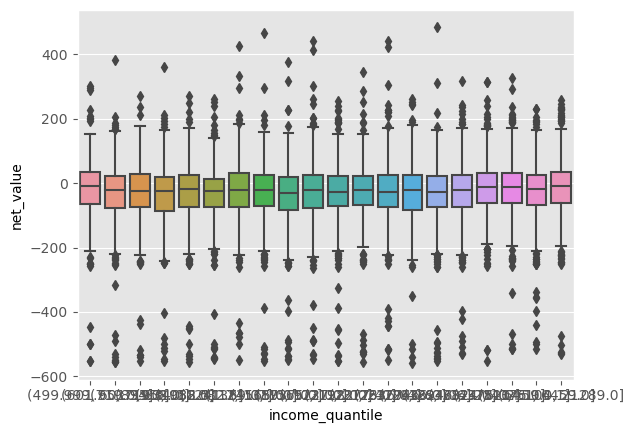

In [22]:
sns.boxplot(data=train_new, x='income_quantile', y='net_value')
plt.show()

In [ ]:
df

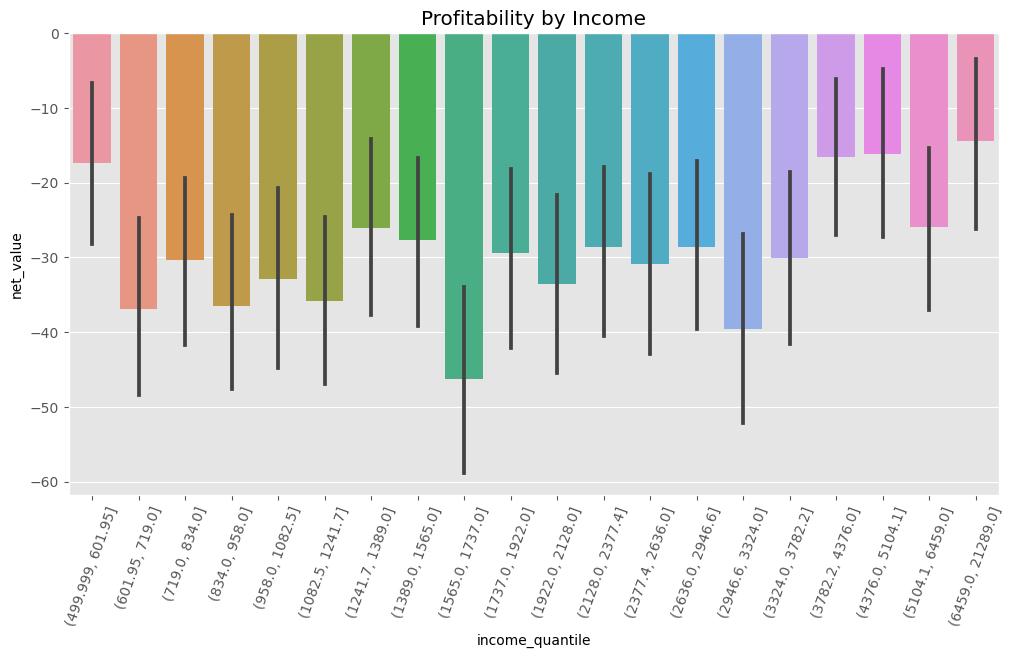

In [27]:
plt.figure(figsize=(12,6))
np.random.seed(123) ## seed because the CIs from seaborn uses boostrap

# pd.qcut create quantiles of a column
sns.barplot(data=train.assign(income_quantile=pd.qcut(train["income"], q=20)), 
            x="income_quantile", y="net_value")
plt.title("Profitability by Income")
plt.xticks(rotation=70);

And, sadly, nope. Yet again, all levels of income have negative average net value. Although it is true that richer customers are "less bad" than non rich customers, they still generate, on average, negative net value. So income didn't help us much here, but what about the other variables, like region? If most of our costs come, say, from having to serve customers in far away places, we should expect that the region distinguishes the profitable from the unprofitable customers.
 
Since region is already a categorical variable, we don't need to use quantiles here. Let's just see the average net value per region.

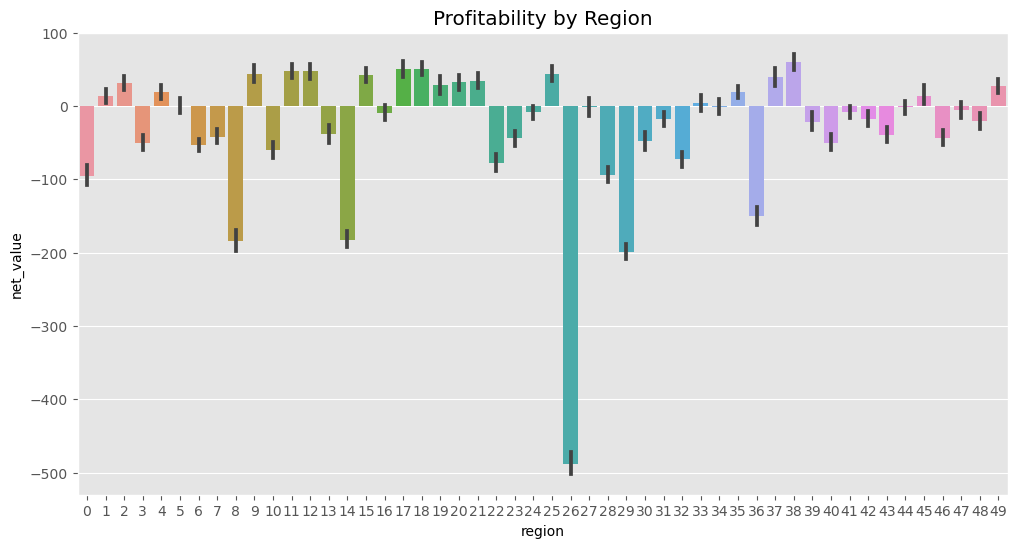

In [8]:
plt.figure(figsize=(12,6))
np.random.seed(123)
region_plot = sns.barplot(data=train, x="region", y="net_value")
plt.title("Profitability by Region");

Bingo! We can clearly see that some regions are profitable, like regions 2, 17, 39, and some are not profitable, like regions 0, 9, 29 and the especially bad region 26. This is looking super promising! We can take this and transform into a policy: only do business with the regions that showed to be profitable *according to the data that we have here*. 
 
One thing to notice is that what we are doing is what ML would do, but in a much simpler way. Namely, we are estimating the expected value of net value in each region: $E[NetValue|Region]$. Now, we need to take this estimation and do something with it.
 
To construct this policy, we will do something very simple. We will construct a 95% confidence interval around the expected net value of a region. If it is greater than zero, we will do business with that region
 
The following code builds a dictionary where the key is the region and the value is the lower bound of the 95% CI. Then, the dictionary generator filters only those regions where the expected net value is positive. The result is the regions we will do business with according to our policy.

In [8]:
# extract the lower bound of the 95% CI from the plot above
regions_to_net = train.groupby('region')['net_value'].agg(['mean', 'count', 'std'])

regions_to_net = regions_to_net.assign(
    lower_bound=regions_to_net['mean'] - 1.96*regions_to_net['std']/(regions_to_net['count']**0.5)
)

regions_to_net_lower_bound = regions_to_net['lower_bound'].to_dict()
regions_to_net = regions_to_net['mean'].to_dict()

# filters regions where the net value lower bound is > 0.
regions_to_invest = {region: net 
                     for region, net in regions_to_net_lower_bound.items()
                     if net > 0}

regions_to_invest

{1: 2.9729729729729737,
 2: 20.543302704837856,
 4: 10.051075065003388,
 9: 32.08862469914759,
 11: 37.434210420891255,
 12: 37.44213667009523,
 15: 32.09847683044394,
 17: 39.52753893574483,
 18: 41.86162250217046,
 19: 15.62406327716401,
 20: 22.06654814414531,
 21: 24.621030401718578,
 25: 33.97022928360584,
 35: 11.68776141117673,
 37: 27.83183541449011,
 38: 49.740709395699994,
 45: 2.286387928016998,
 49: 17.01853709535029}

`regions_to_invest` has all the regions we will engage with. Lets now see how this policy would have performed in our test set, the one we pretend not to have. This is a key step in evaluating our policy, because it could very well be that, simply by chance, a region in our training set is appearing to be profitable. If that is only due to randomness, it will be unlikely that we will find that same pattern in the test set.
 
To do so, we will filter the test set to contain only the customers in the regions defined as profitable (according to our training set). Then, we will plot the distribution of net income for those customers and also show the average net income of our policy.

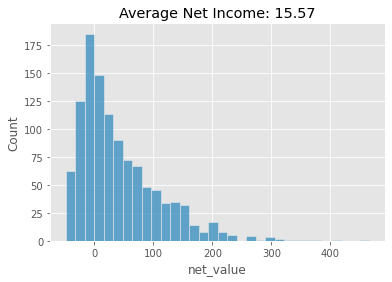

In [9]:
region_policy = (test[test["region"]
                      # filter regions in regions_to_invest
                      .isin(regions_to_invest.keys())]) 

sns.histplot(data=region_policy, x="net_value")
# average has to be over all customers, not just the one we've filtered with the policy
plt.title("Average Net Income: %.2f" % (region_policy["net_value"].sum() / test.shape[0]));

## Machine Learning Models as Policy Inputs
 
If you are willing to do even better, we can now use the power of machine learning. Keep in mind that this might add tones of complexity to the whole thing and usually only marginal gains. But, depending on the circumstances, marginal gains can be translated into huge piles of money and that's why machine learning is so valuable these days.
 
Here, I'll use a Gradient Boosting model. It's a fairly complicated model to explain, but one that is very simple to use. For our purpose, we don't need to get into the details of how it works. Instead, just remember what we've seen in our ML Crash course: a ML model is a super powerful predictive machine that has some complexity parameters. It's a tool to estimate $E[Y|X]$. The more complex, the more powerful the model becomes. However, if the complexity is too high, the model will overfit, learn noise and not generalize well to unseen data. Hence, we need to use cross validation here to see if the model has the right complexity. 
 
Now, we need to ask, how can good predictions be used to improve upon our simple region policy to identify and engage with profitable customers? I think there are two main improvements that we can make here. First, you will have to agree that going through all the features looking for one that distinguishes good from bad customers is a cumbersome process. Here, we had only 3 of them (age, income and region), so it wasn't that bad, but imagine if we had more than 100. Also, you have to be careful with issues of [multiple testing](https://en.wikipedia.org/wiki/Multiple_comparisons_problem) and false positive rates. The second reason is that it is probably the case that you need more than one feature to distinguish between customers. In our example, we believe that features other than region also have some information on customer profitability. Sure, when we looked at income alone it didn't give us much, but what about income in those regions that are just barely unprofitable? Maybe, in those regions, if we focus only on richer customers, we could still get some profit. Technically speaking, we are saying that $E[NetValue|Region, Income, Age]$ is a better predictor of `NetValue` than $E[NetValue|Region]$. This makes a lot of sense. Using more information about income and age on top of region should allow us to predict net value better. 
 
Coming up with these more complicated policies that involve interacting more than one feature can be super complex. The combinations we have to look at grow exponentially with the number of features and it is simply not a practical thing to do. Instead, what we can do is throw all those features into a machine learning model and have it learn those interactions for us. This is precisely what we will do next.
 
The goal of this model will be to predict `net_value` using `region`, `income`, `age`. To help it, we will take the region feature, which is categorical, and encode it with a numerical value. We will replace each region by the region's average net value on the training set. Remember that we have those stored in the `regions_to_net` dictionary? With this, all we have to do is call the method `.replace()` and pass this dictionary as the argument. I'll create a function for this, because we will do this replacement multiple times. This process of transforming features to facilitate learning is generally called feature engineering.

In [10]:
def encode(df): 
    return df.replace({"region": regions_to_net})

Next, our model will be imported from [Sklearn](https://scikit-learn.org/stable/). All their models have a pretty standard usage. First, you instantiate the model passing in the complexity parameters. For this model, we will set the number of estimators to 400, the max depth to 4 and so on. The deeper the model and the greater the number of estimators, the more powerful the model will be. Of course, we can't let it be too powerful, otherwise it will learn the noise in the training data or overfit to it. Again, you don't need to know the details of what these parameters do. Just keep in mind that this is a very good prediction model. Then, to train our model, we will call the `.fit()` method, passing the features `X` and the variable we want to predict - or target variable - `net_value`. 

In [11]:
model_params = {'n_estimators': 400,
                'max_depth': 4,
                'min_samples_split': 10,
                'learning_rate': 0.01,
                'loss': 'ls'}

features = ["region", "income", "age"]
target = "net_value"

np.random.seed(123)

reg = ensemble.GradientBoostingRegressor(**model_params)

# fit model on the training set
encoded_train = train[features].pipe(encode)
reg.fit(encoded_train, train[target]);

The model is now trained. Next, we need to check if it is any good. To do this, we can look at the predictive performance of this model **on the test set**. There are tons of metrics to evaluate the predictive performance of a machine learning model. Here, I'll use one which is called $R^2$. We don't need to get into much detail here. It suffices to say that the $R^2$ is used to evaluate models that predict a continuous variable (like `net_income`). Also, $R^2$ can go from minus infinity (it will be negative if the prediction is worse than the average) to 1.0. The $R^2$ tells us how much of the variance in `net_income` is explained by our model.

In [12]:
train_pred = (encoded_train
              .assign(predictions=reg.predict(encoded_train[features])))

print("Train R2: ", r2_score(y_true=train[target], y_pred=train_pred["predictions"]))
print("Test R2: ", r2_score(y_true=test[target], y_pred=reg.predict(test[features].pipe(encode))))

Train R2:  0.7108790300152951
Test R2:  0.6938513063048141


In this case, the model explains about 71% of the `net_income` variance in the training set but only about 69% of the `net_income` variance in the test set. This is expected. Since the model had access to the training set, the performance there will often be overestimated. Just for fun (and to learn more about overfitting), try setting the 'max_depth' of the model to 14 and see what happens. You will likely see that the train $R^2$ skyrockets but the test set $R^2$ gets lower. This is what overfitting looks like. 
 
Next, in order to make our policy, we will store the test set predictions in a `prediction` column. This predictions are estimates of $E[NetValue|Age, Income, Region ]$.

In [13]:
model_policy = test.assign(prediction=reg.predict(test[features].pipe(encode)))

model_policy.head()

,customer_id,region,income,age,net_value,prediction
5952,5952,19,1983,23,21,47.734883
1783,1783,31,914,31,-46,-36.026935
4811,4811,33,1349,25,-19,22.553420
145,145,20,1840,26,55,48.306256
7146,7146,19,3032,34,-17,7.039414


Just like we did with the `regions` feature, we can show the average net value by predictions of our model. Since the model is continuous and not categorical, we need to make it discrete first. One way of doing so is using pandas `pd.qcut` (by golly! I love this function!), which partitions the data into quantiles using the model prediction. Let's use 50 quantiles because 50 is the number of regions that we had. And just as a convention, I tend to call these model quantiles **model bands**, because it gives the intuition that this group has model predictions within a band, say, from -10 to 200. 

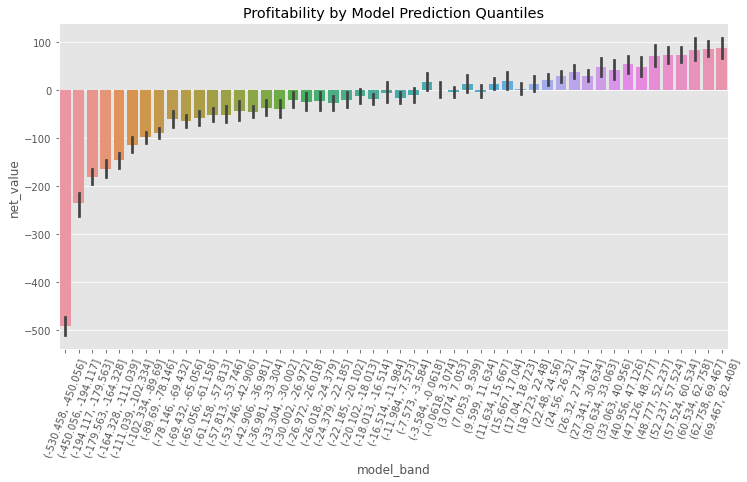

In [14]:
plt.figure(figsize=(12,6))

n_bands = 50
bands = [f"band_{b}" for b in range(1,n_bands+1)]

np.random.seed(123)
model_plot = sns.barplot(data=model_policy
                         .assign(model_band = pd.qcut(model_policy["prediction"], q=n_bands)),
                         x="model_band", y="net_value")
plt.title("Profitability by Model Prediction Quantiles")
plt.xticks(rotation=70);

Here, notice how there are model bands where the net value is super negative, while there are also bands where it is very positive. Also, there are bands where we don't know exactly if the net value is negative or positive. Finally, notice how they have an upward trend, from left to right. Since we are predicting net value, it is expected that the prediction will be proportional to what it predicts.

Now, to compare this policy using a machine learning model with the one using only the regions we can also show the histogram of net gains, along with the total net value in the test set.

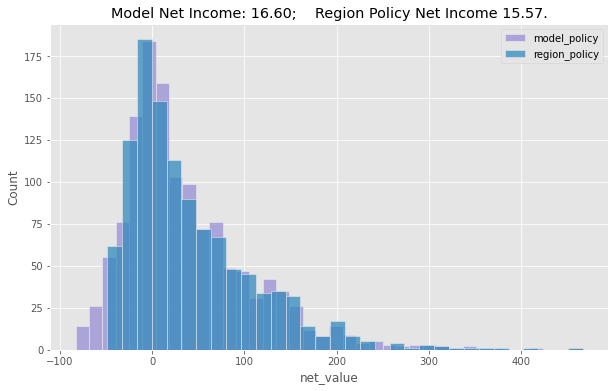

In [15]:
plt.figure(figsize=(10,6))
model_plot_df = (model_policy[model_policy["prediction"]>0])
sns.histplot(data=model_plot_df, x="net_value", color="C2", label="model_policy")

region_plot_df = (model_policy[model_policy["region"].isin(regions_to_invest.keys())])
sns.histplot(data=region_plot_df, x="net_value", label="region_policy")

plt.title("Model Net Income: %.2f;    Region Policy Net Income %.2f." % 
          (model_plot_df["net_value"].sum() / test.shape[0],
           region_plot_df["net_value"].sum() / test.shape[0]))
plt.legend();

As we can see, the model generates a better policy than just using the `region` feature, but not by much. While the model policy would have made us about 16.6 reais / customer on the test set, the region policy would have made us only 15.5 / customer. It's just slightly better, but if you have tons and tons of customers, this might already justify using a model instead of a simple one feature policy.
 
 
## Fine Grain Policy
 
As a recap, so far, we tested the most simple of all policies, which is just engaging with all the customers. This policy can be seen as estimating the marginal net value, $\hat{E}[NetValue] > 0$. Since that didn't work (the average net income per customer was negative), we developed a single feature policy that was based on regions: we would do business in some regions, but not in others, or $\hat{E}[NetValue|Region] > 0$. This already gave us very good results. Next, we went full machine learning, with a predictive model that used all the features: $\hat{E}[NetValue|Region, Income, Age] > 0$. Then, we used that model as an input to a policy and chose to do business with all the customers whose net income predictions were above zero.
 
Here, the decision which the policy handles is very simple: engage with a customer or don't engage. The policies we had so far dealt with the binary case. They were in the form of
 
```
if prediction > 0 then do business else don't do business.
```
 
This is something we call **thresholding**. If the prediction exceeds a certain threshold (zero in our case, but could be something else), we take one decision, if it doesn't, we take another. One other example of where this could be applied in real life is transactional fraud detection: if the prediction score of a model that detects fraud is above some threshold `X`, we deny the transaction, otherwise we approve it.
 
Thresholding works in lots of real case scenarios and it is particularly useful when the nature of the decision is binary. However, we can think of cases where things tend to be more nuanced. For example, you might be willing to spend more on marketing to get the attention of very profitable customers. Or you might want to add them to some prime customers list, where you give special treatment to them, but it also costs you more to do so. Notice that if we include these possibilities, your decision goes from binary (engage vs don't engage) to continuous: how much should you invest in a customer.
 
Here, for the next example, suppose your decision is not just who to do business with, but how much marketing costs you should invest in each customer. And for the sake of the example, assume that you are competing with other firms and whoever spends more on marketing in a particular customer wins that customer (much like a bidding mechanism). In that case, it makes sense to invest more in highly profitable customers, less in marginally profitable customers and not at all in non profitable customers.
 
One way to do that is to discritize your predictions into bands. We've done this previously for the purpose of model comparison, but here we'll do it for decision making. Let's create 20 bands. We can think of those as quantiles or equal size groups. The first band will contain the 5% less profitable customers *according to our predictions*, the second band will contain from the 5% to the 10% less profitable and so on. The last band, 20, will contain the most profitable customers.
 
Notice that the binning too has to be estimated on the training set and applied on the test set! For this reason, we will compute the bins using `pd.qcut` on the training set. To actually do the binning, we will use `np.digitize`, passing the bins that were precomputed on the training set.

In [16]:
def model_binner(prediction_column, bins):
    # find the bins according to the training set
    bands = pd.qcut(prediction_column, q=bins, retbins=True)[1]
    
    def binner_function(prediction_column):
        return np.digitize(prediction_column, bands)
    
    return binner_function
    

# train the binning function
binner_fn = model_binner(train_pred["predictions"], 20)

# apply the binning
model_band = model_policy.assign(bands = binner_fn(model_policy["prediction"]))
model_band.head()

,customer_id,region,income,age,net_value,prediction,bands
5952,5952,19,1983,23,21,47.734883,18
1783,1783,31,914,31,-46,-36.026935,7
4811,4811,33,1349,25,-19,22.553420,15
145,145,20,1840,26,55,48.306256,18
7146,7146,19,3032,34,-17,7.039414,13


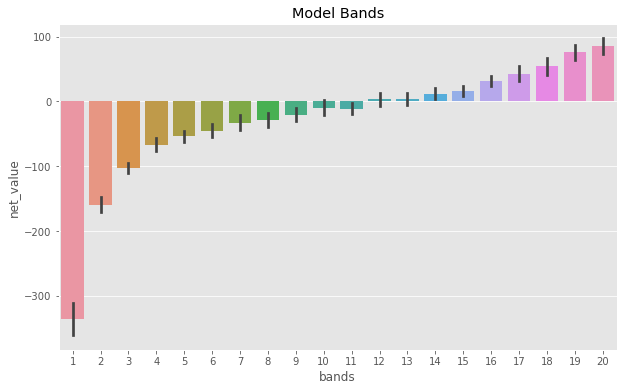

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=model_band, x="bands", y="net_value")
plt.title("Model Bands");

With these bands, we can allocate the bulk of our marketing investments to band 20 and 19. Notice how we went from a binary decision (engage vs not engage), to a continuous one: how much to invest on marketing for each customer. Of course you can fine tune this even more, adding more bands. In the limit, you are not binning at all. Instead, you are using the raw prediction of the model and you can create decision rules like
 
```
mkt_investments_i = model_prediction_i * 0.3
```
 
where for each customer $i$, you invest 30% of the net_value predicted by the model (30% was an arbitrary number, but you get the point).
 
## Key Ideas
 
We've covered A LOT of ground here in a very short time, so I think this recap is extremely relevant for us to see what we accomplished here. First, we learned how the majority of machine learning applications involve nothing more than making good predictions, where prediction is understood as mapping from a known input to an initially unknown, but well defined output. We can also understand prediction as estimating an expectation function $E[Y|X]$. But when I say "nothing more", I'm not being entirely fair. We also saw how good predictions can solve more problems than we might realize at first sight, like language translation and self-driving cars. 
 
Then, we got back down to earth and looked at how good predictions can help us with more common tasks, like figuring out which customer we should bring in and which to avoid. Specifically, we looked at how we could predict customer profit. With that prediction, we built a policy that decides who we should do business with. Notice that this is just an example of where prediction models can be applied. There are sure to be tonnes of other applications, like credit card underwriting, fraud detection, cancer diagnostics and anything else where good predictions might be useful.
 
The key takeaway here is that **if you can frame your business problem as a prediction problem, then machine learning is probably the right tool for the job**. I really can't emphasize this enough. With all the hype around machine learning, I feel that people forget about this very important point and often end up making models that are very good at predicting something totally useless. Instead of thinking about how to frame a business problem as a prediction problem and *then* solving it with machine learning, they often build a prediction model and try to see what business problem could benefit from that prediction. This might work, but, more often than not, is a shot in the dark that only generates solutions in search of a problem.
 
## References 
 
The things I've written here are mostly stuff from my head. I've learned them through experience. This means there isn't a direct reference I can point you to. It also means that the things I wrote here have **not** passed the academic scrutiny that good science often goes through. Instead, notice how I'm talking about things that work in practice, but I don't spend too much time explaining why that is the case. It's a sort of science from the streets, if you will. However, I am putting this up for public scrutiny, so, by all means, if you find something preposterous, open an issue and I'll address it to the best of my efforts. 
 
Finally, I believe I might have been too quick for those who were hoping for a comprehensive and detailed introduction of machine learning. To be honest, I believe that where I can truly generate value is teaching about causal inference, not machine learning. For the latter, there are tons of amazing online resources, much better than I could ever dream of creating. The classical one is [Andrew Ng's course on Machine Learning](https://www.coursera.org/learn/machine-learning) and I definitely recommend you take a look into it if you are new to machine learning.
 
## Contribute
 
Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. It uses only free software, based in Python. Its goal is to be accessible monetarily and intellectually.
If you found this book valuable and you want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits or giving feedback on passages you didn't understand. Just go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it useful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).